# Topological Data Analysis Turorial

## Sergio Nieto

- [SciKitTDA](https://scikit-tda.org/) by Nataniel Saul and Chris Tralie
- [Teaspoon](http://elizabethmunch.com/code/teaspoon/index.html) By Liz Munch and Firas Khasawneh


- [Ripser](https://github.com/Ripser/ripser) by Ulrich Bauer (C++)
- [GUDHI](http://gudhi.gforge.inria.fr/) developed at INRIA
- [Giotto-tda](https://giotto-ai.github.io/) developted at EPFL
- [Cubicle](https://bitbucket.org/hubwag/cubicle/src/master/) by Hubert Wagner
- [HomcCube](https://i-obayashi.info/software.html) By Ippei Obayashi.
- [DIPHA](https://github.com/DIPHA/dipha) by Ulrich Bauer and Michael Kerber
- [diamorse](https://github.com/AppliedMathematicsANU/diamorse) developed at The Australian National University.
- [Perseus](http://people.maths.ox.ac.uk/nanda/perseus/) by Vidit Nanda
- [Dionysus2](https://www.mrzv.org/software/dionysus2/) by Dimitry Morozov (C++, Python)
- [CliqueTop](https://github.com/nebneuron/clique-top) by Chad Giusti (Matlab)
- [Eirene](http://gregoryhenselman.org/eirene/index.html) by Greg Henselman (Julia)
- [Ripser-live](http://live.ripser.org/)  by Ulrich Bauer (browser)
- [CHomP](https://github.com/shaunharker/CHomP") by Shaun Harker (C++) 
- [Hera](https://bitbucket.org/grey_narn/hera) by Michael Kerber, Dmitriy Morozov, and Arnur Nigmetov
- [JavaPlex](https://github.com/appliedtopology) by Andrew Tausz, Mikael Vejdemo-Johansson and Henry Adams
- [PHAT](https://bitbucket.org/phat-code/phat) by Ulrich Bauer, Michael Kerber, Jan Reininghaus, Hubert Wagner, and Bryn Keller
-    <a href="https://topology-tool-kit.github.io/" target="_blank">Topology ToolKit</a>&nbsp;(C++) by&nbsp;Julien Tierny, Guillaume Favelier, Joshua Levine, Charles Gueunet, and Micha&euml;l Michaux (I think?)
-   <a href="https://cran.r-project.org/web/packages/TDA/index.html" target="_blank">TDA</a>&nbsp;(R)&nbsp;by&nbsp;Brittany T. Fasy, Jisu Kim, Fabrizio Lecci, and Cl&eacute;ment Maria
-    <a href="https://github.com/paultpearson/TDAmapper" target="_blank">TDAMapper </a>(R) by&nbsp;Paul Pearson, Daniel M&uuml;ellner, and Gurjeet Singh
-    <a href="https://people.clas.ufl.edu/peterbubenik/intro-to-tda/" target="_blank">R scripts for TDA</a>&nbsp;by Peter Bubenik
-    <a href="https://github.com/nebneuron/Simplicial" target="_blank">Simplicial complexes for Julia</a> by Alex Kunin and Vladimir Itskov
-    <a href="http://web.cse.ohio-state.edu/~dey.8/SimBa/Simba.html" target="_blank">SimBa</a>&nbsp;and&nbsp;<a href="http://web.cse.ohio-state.edu/~dey.8/SimPers/Simpers.html" target="_blank">SimPer</a>&nbsp;(C++) by&nbsp;Tamal K Dey, &nbsp;Fengtao Fan, &nbsp;Dayu Shi, &nbsp;and Yusu Wan&nbsp;
- <a href="http://danifold.net/mapper/index.html" target="_blank">Python Mapper</a>&nbsp;(Python) by&nbsp;Daniel M&uuml;llner and Aravindakshan Babu
-    <a href="https://www.math.upenn.edu/~dlotko/persistenceLandscape.html" target="_blank">Persistence Landscape Toolbox</a>&nbsp;(C++) by Pawel Dlotko&#8203;
    

In [1]:
# Basic imports 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
from IPython.display import Video

# scikit-tda imports..... Install all with -> pip install scikit-tda
#--- this is the main persistence computation workhorse
import ripser
# from persim import plot_diagrams
import persim
# import persim.plot

In [2]:
# teaspoon imports...... Install with -> pip install teaspoon
#---these are for generating data and some drawing tools 
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw

#---these are for generating time series network examples
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

## Computing persistence on a point cloud


Basic version: point clouds in $\mathbb{R}^n$ inheriting Euclidean metric

<class 'numpy.ndarray'>
(100, 2)


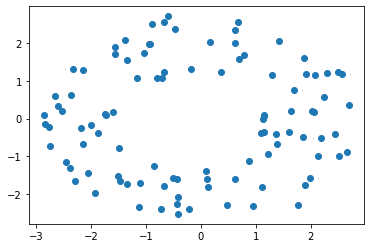

In [3]:
r = 1.1
R = 2.9
P = makePtCloud.Annulus(N=100, r=r, R=R, seed=None) # teaspoon data generation
plt.scatter(P[:,0],P[:,1])
#print(P)
print(type(P))
print(P.shape)

In [4]:
def drawTDAtutorial(P,diagrams, R = 2):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

    # Draw point cloud 
    plt.sca(axes[0])
    plt.title('Point Cloud')
    plt.scatter(P[:,0],P[:,1])

    # Draw diagrams
    plt.sca(axes[1])
    plt.title('0-dim Diagram')
    Draw.drawDgm(diagrams[0])

    plt.sca(axes[2])
    plt.title('1-dim Diagram')
    Draw.drawDgm(diagrams[1])
    plt.axis([0,R,0,R])

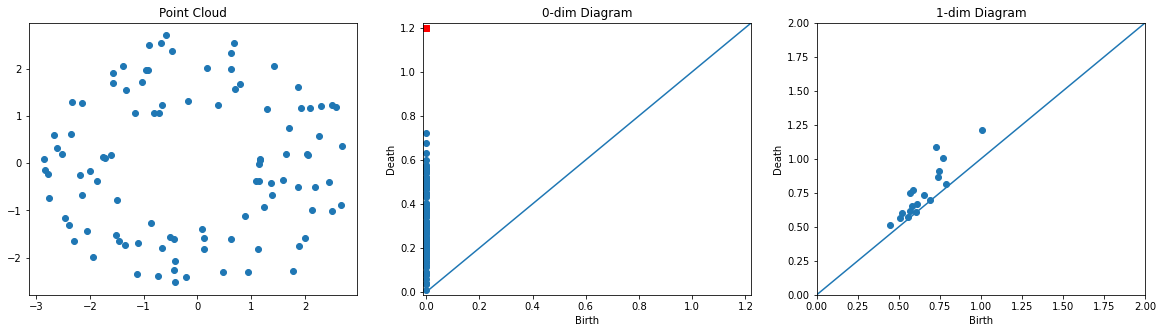

In [7]:
diagrams = ripser.ripser(P)['dgms']

# 
drawTDAtutorial(P,diagrams)

In [8]:
# 
data = ripser.ripser(P)
# print(data.keys())
# print(data['dgms'])
data['dgms'][1]
# len(data['dgms'])

array([[1.00595856, 1.21093452],
       [0.78533167, 0.81388515],
       [0.76952761, 1.00604439],
       [0.74222666, 0.90874225],
       [0.74143529, 0.86702919],
       [0.72843182, 1.08619463],
       [0.7237649 , 2.32808256],
       [0.68790317, 0.69635403],
       [0.65398872, 0.73148501],
       [0.61284578, 0.6651637 ],
       [0.60216284, 0.60979229],
       [0.58768511, 0.77281779],
       [0.58119929, 0.65276837],
       [0.57082629, 0.61370677],
       [0.57019478, 0.74816197],
       [0.55385226, 0.57574338],
       [0.51926094, 0.60415721],
       [0.50539291, 0.56718177],
       [0.44693345, 0.51329464]])

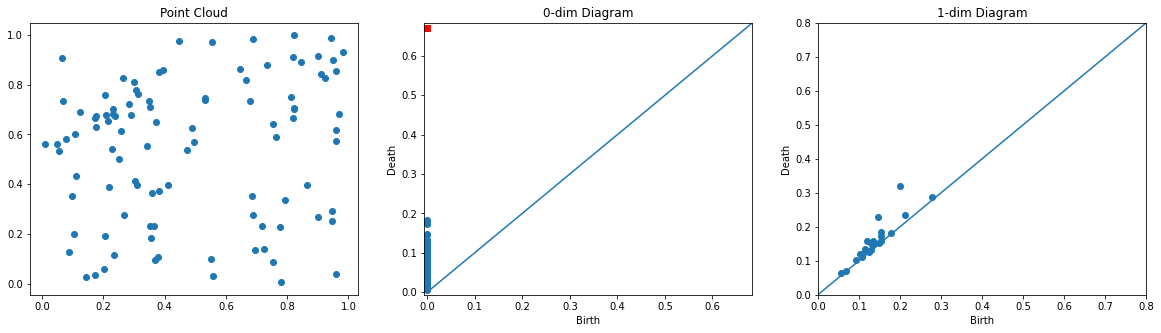

In [9]:
P = makePtCloud.Cube()
diagrams = ripser.ripser(P)['dgms']

# 
drawTDAtutorial(P,diagrams,R=0.8) # 


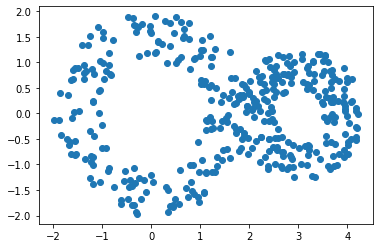

In [10]:
#
def DoubleAnnulus(r1 = 1, R1 = 2, r2 = .8, R2 = 1.3, xshift = 3):
    P = makePtCloud.Annulus(r = r1, R = R1)
    Q = makePtCloud.Annulus(r = r2, R = R2)
    Q[:,0] = Q[:,0] + xshift
    P = np.concatenate((P, Q) )
    return(P)

P = DoubleAnnulus(r1 = 1, R1 = 2, r2 = .5, R2 = 1.3, xshift = 3) 
plt.scatter(P[:,0], P[:,1])

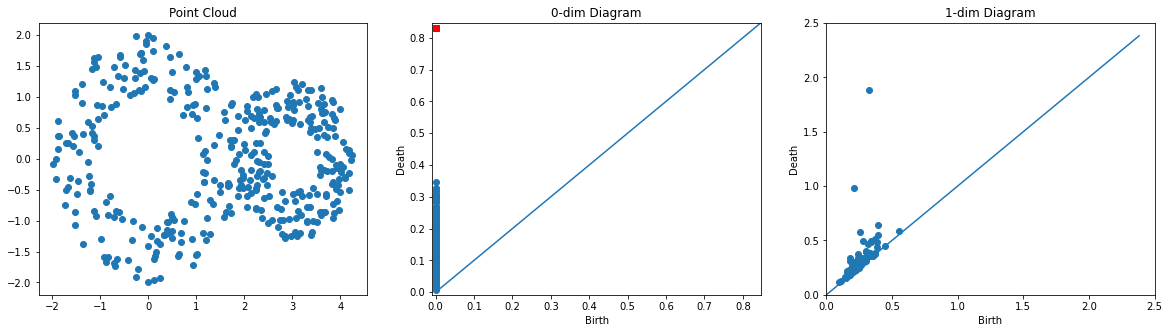

In [11]:
P = DoubleAnnulus(r1 = 1, R1 = 2, r2 = .5, R2 = 1.3, xshift = 3) # 
diagrams = ripser.ripser(P)['dgms']

# 
drawTDAtutorial(P,diagrams,R=2.5) # 

### Erdos-Renyii graph

In [12]:
# 
def drawGraphEx(G):
    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=70)

    # edges
    nx.draw_networkx_edges(G, pos,  width=2)
    # nx.draw_networkx_edges(
    #     G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
    # )

    # labels
    # nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    edge_labels=nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G, 'weight'))

There are 98 edges.


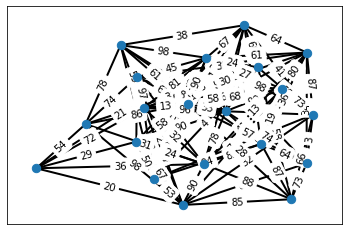

In [13]:
n = 20
p = .5

# Generate random graph 
G = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

m = len(G.edges)
print('There are', m,'edges.')

# Generate random edge weights in the interval [0,maxWeight]
maxWeight = 100
weights = np.random.randint(maxWeight, size = m)

for i, e in enumerate(G.edges()):
    G[e[0]][e[1]] ['weight'] = weights[i]
    
drawGraphEx(G)

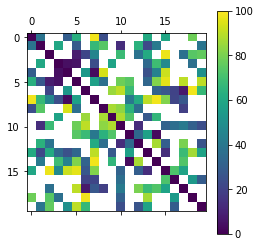

In [14]:
A = nx.adjacency_matrix(G, weight = 'weight')
A = A.todense() # Turn into dense matrix 
A = np.array(A) # to array instead of a matrix
A = A.astype('float64') # Needed to put in np.inf
A[ np.where(A == 0)] = np.inf
np.fill_diagonal(A,0)

im = plt.matshow(A, vmax = 100) # the np.inf values show up as white
plt.colorbar(im)

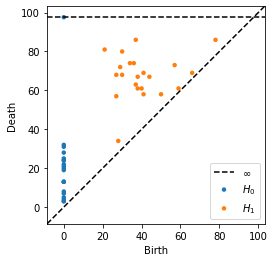

In [15]:
diagrams = ripser.ripser(A, distance_matrix=True)['dgms']
persim.plot_diagrams(diagrams)
# print(diagrams)
# print(diagrams)